In [18]:
%load_ext autoreload
%autoreload 2

from sklearn.pipeline import make_pipeline 
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, classification_report

from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import mediapipe as mp
import pickle

mp_drawing = mp.solutions.drawing_utils 
mp_holistic = mp.solutions.holistic

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [19]:
df = pd.read_csv('alphabet_gestures.csv')
df = df.drop(columns=["frame"])
X = df.drop('class', axis=1) 
y = df['class']

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X.values, y, test_size=0.3, random_state=12345)

In [21]:
y_test

2963    H
949     I
3339    B
4285    F
345     E
       ..
4558    G
2702    H
913     I
509     E
4237    F
Name: class, Length: 1499, dtype: object

In [22]:
pipelines = {
    'lr':make_pipeline(MinMaxScaler(), LogisticRegression()),
    'rc':make_pipeline(MinMaxScaler(), RidgeClassifier()),
    'rf':make_pipeline(MinMaxScaler(), RandomForestClassifier()),
    'sv':make_pipeline(MinMaxScaler(), SVC(probability=True))
}

In [23]:
fit_models = {}
for algorithm, pipeline in pipelines.items():
    model = pipeline.fit(X_train, y_train)
    fit_models[algorithm] = model

/home/victor/anaconda3/envs/mediapipe/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [24]:
fit_models

{'lr': Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                 ('logisticregression', LogisticRegression())]),
 'rc': Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                 ('ridgeclassifier', RidgeClassifier())]),
 'rf': Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                 ('randomforestclassifier', RandomForestClassifier())]),
 'sv': Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                 ('svc', SVC(probability=True))])}

In [25]:
fit_models['sv'].predict(X_test)

array(['H', 'I', 'B', ..., 'F', 'E', 'F'], dtype=object)

In [26]:
names=['Log.Regress','Ridge Class','Rand.Forest', 'SVC']
scores=[]
for algorithm, model in fit_models.items():
    y_pred= model.predict(X_test)
    scores.append(accuracy_score(y_test, y_pred))
    print(algorithm, accuracy_score(y_test, y_pred))

tr_split=pd.DataFrame({'Name': names,'Score': scores})

lr 0.961974649766511
rc 0.961974649766511
rf 0.9873248832555037
sv 0.9426284189459639


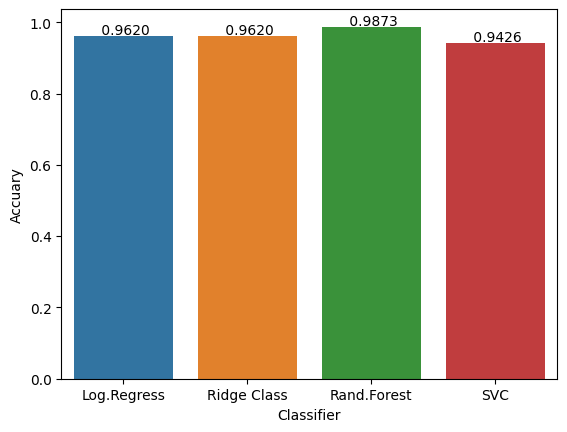

In [27]:
axis = sns.barplot (x = 'Name', y = 'Score', data = tr_split) 
axis.set (xlabel = 'Classifier', ylabel = 'Accuary')

for p in axis.patches: 
    height = p.get_height () 
    axis.text (p.get_x () + p.get_width () / 2, height + 0.005, '{: 1.4f}'. format
                 (height), ha = "center") 

In [11]:
words = ['dolor_cabeza', 'hospital', 'ponerse_mascarilla', 'dolor_garganta', 'dificultad_respirar', 'coronavirus', 'evitar_contacto', 'quedan_en_casa', 'fiebre', 'medico']

In [28]:
words = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I']

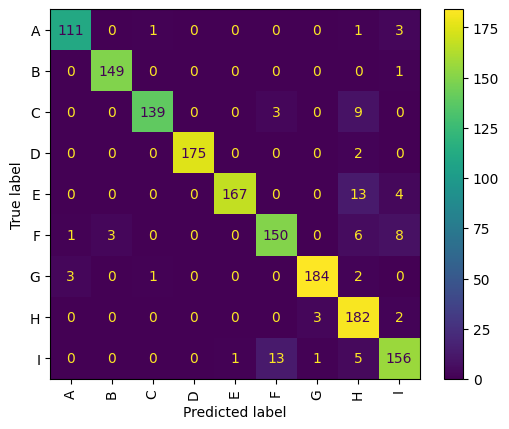

In [29]:
clf = SVC(random_state=0)
clf.fit(X_train, y_train)
SVC(random_state=0)
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot(xticks_rotation='vertical')
plt.show()

In [30]:
print(classification_report(y_test, y_pred, labels=clf.classes_))

              precision    recall  f1-score   support

           A       0.97      0.96      0.96       116
           B       0.98      0.99      0.99       150
           C       0.99      0.92      0.95       151
           D       1.00      0.99      0.99       177
           E       0.99      0.91      0.95       184
           F       0.90      0.89      0.90       168
           G       0.98      0.97      0.97       190
           H       0.83      0.97      0.89       187
           I       0.90      0.89      0.89       176

    accuracy                           0.94      1499
   macro avg       0.95      0.94      0.94      1499
weighted avg       0.95      0.94      0.94      1499



In [31]:
with open('alphabet_gestures.pkl', 'wb') as f:
    pickle.dump(fit_models['sv'], f)